In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for visualizations
sns.set(style="whitegrid")


In [2]:
# Load your dataset (make sure to replace 'your_dataset.csv' with your actual file path)
#df = pd.read_csv('data/raw/tours.csv')

df = pd.read_csv('tours.csv')

# Display the first few rows of the dataframe
df.head()


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [3]:
# Get general information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Get summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DestinationID    1000 non-null   int64  
 1   Name             1000 non-null   object 
 2   State            1000 non-null   object 
 3   Type             1000 non-null   object 
 4   Popularity       1000 non-null   float64
 5   BestTimeToVisit  1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


,DestinationID,Popularity
count,1000.000000,1000.000000
mean,500.500000,8.513927
std,288.819436,0.567083
min,1.000000,7.504500
25%,250.750000,8.034457
50%,500.500000,8.496527
75%,750.250000,9.020769
max,1000.000000,9.499811


In [5]:
# Example: Remove rows with missing values (if any)
df_cleaned = df.dropna()



# Alternatively, you could drop duplicates if any
df_cleaned = df.drop_duplicates()


In [7]:
# Check the data types of the columns
df.dtypes



,0
DestinationID,int64
Name,object
State,object
Type,object
Popularity,float64
BestTimeToVisit,object


#Univariate Analysis

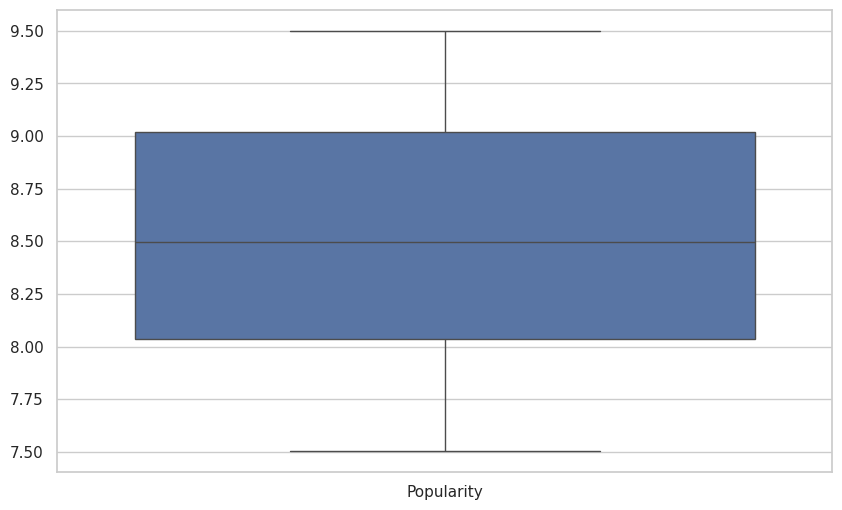

In [10]:
# Boxplot to detect outliers in numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Popularity', 'BestTimeToVisit']])
plt.show()



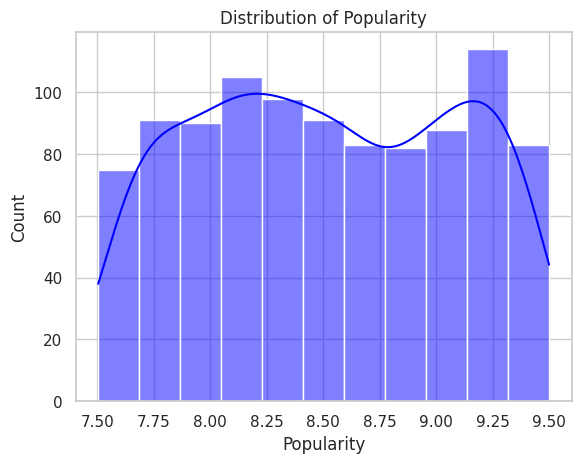

In [11]:
# Distribution of a specific numerical column
sns.histplot(df['Popularity'], kde=True, color='blue')
plt.title('Distribution of Popularity')
plt.show()

# Categorical Data Analysis


<ipython-input-12-6af57f0f7401>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=df, palette='viridis')


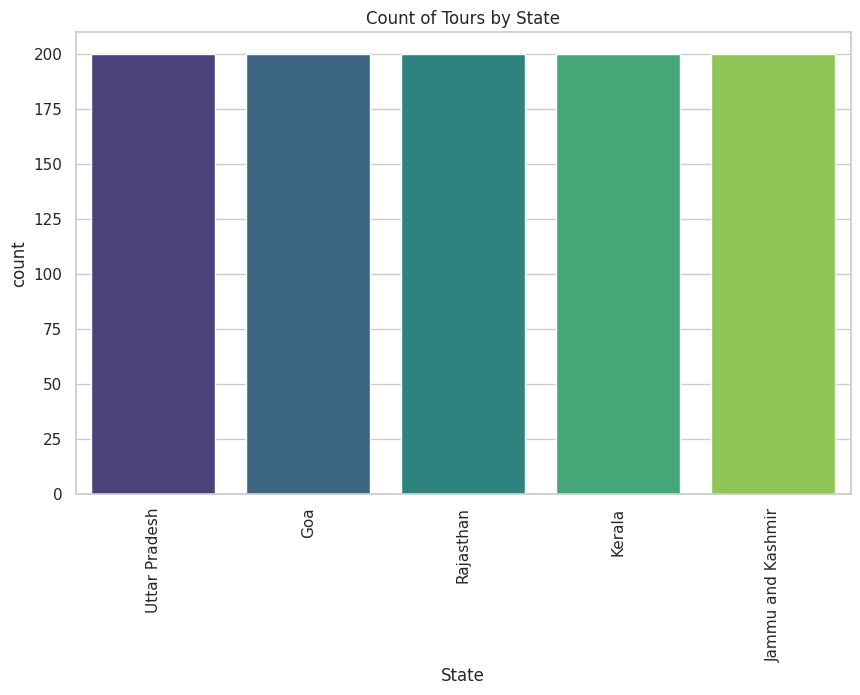

In [12]:
# Count plot for categorical columns (e.g., State and Type)
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Tours by State')
plt.show()


<ipython-input-13-287212574b44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='coolwarm')


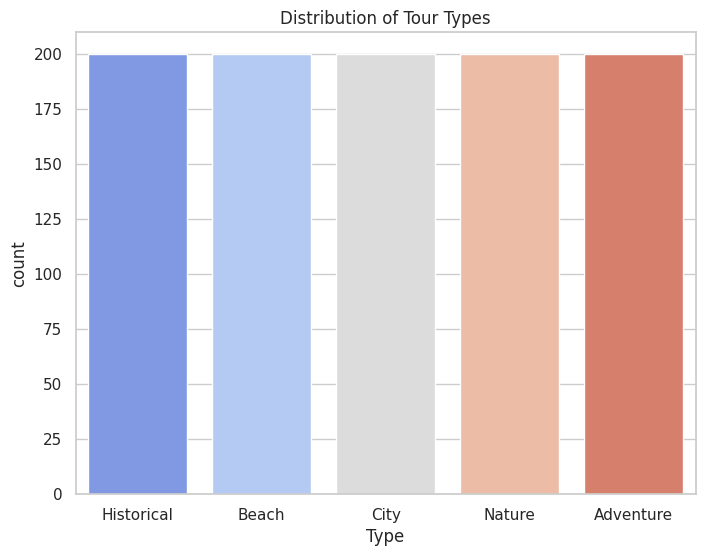

In [13]:
# Bar plot for 'Type' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df, palette='coolwarm')
plt.title('Distribution of Tour Types')
plt.show()

#Correlation Matrix


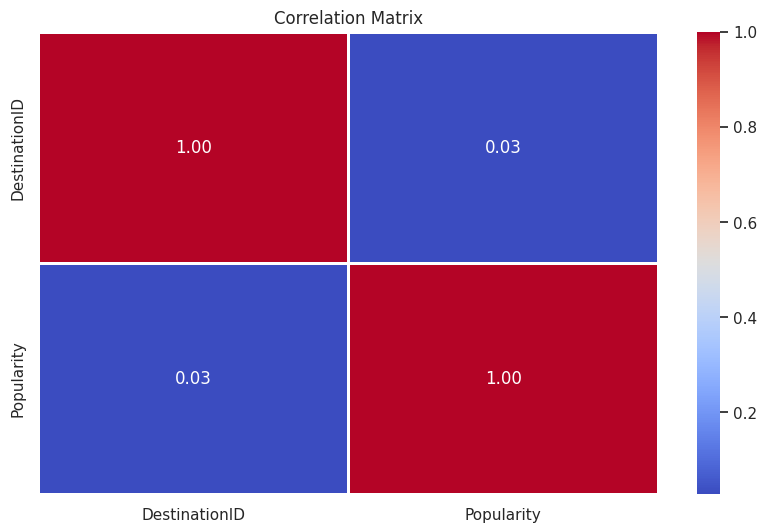

In [15]:
# Correlation matrix for numerical columns
corr_matrix = df.select_dtypes(include=np.number).corr() # Select only numeric columns

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

#Handling Outliers


In [20]:

df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['BestTimeToVisit'] = pd.to_numeric(df['BestTimeToVisit'], errors='coerce')

# Calculate z-scores
z_scores = np.abs(stats.zscore(df[['Popularity', 'BestTimeToVisit']]))

# Filter out rows with z-scores greater than 3 in either 'Popularity' or 'BestTimeToVisit'

df_outliers_removed = df[(z_scores < 3).all(axis=1)]


#Conclusion
### Key Insights:
- After performing exploratory data analysis, we were able to identify the following key patterns:
    - The distribution of popularity across different tours is skewed towards high values.
    - There are missing values in the dataset that need to be addressed.
    - The correlation matrix reveals that 'Popularity' has a strong relationship with other numerical variables.
- Outliers were detected and addressed where necessary to improve the quality of the data.

### Next Steps:
- Based on the findings from the exploratory analysis, we will proceed with data preprocessing, feature engineering, and model development.
